In [1]:
'''
Name: Jack Urso
Date: 5/04/2021 (DUE)
Class: CSC 364
Assignment: K-Means Clustering Implementation - Final Project

Question:
- What are the similarities between the weather and violent crime 
  in Chicago?

Description:
- For each violent crime attribute and the weather atrributes, I 
  used K-Means to identify and group similar data points. The K-Means
  algorithm works by finding observations that share important 
  characteristics and classifies them together into 'k' clusters.
- Steps to Program:
  1.) Read in the dataset.
  2.) Preprocessing the dataset:
      - Changing attribute names.
      - Normalizing the dataset using MinMaxScaler() [0-1 Scale]
  3.) Run K-Means Algorithm 7 times (each subset):
      - Use the "elbow method" to find k value.
      - Then,
         A.) With the given 'k' value, randomly choosing an intial centroid
             for each cluster.
         B.) Assign each observation to its nearest centroid.
         C.) Update the centroids as being the center in their 
             respective observation.
         D.) We repeat steps B-C over and over until there is no further 
             change in the clusters.
  4.) Print all the centroids.
      * Where I performed the cluster analysis
      
References:
- https://www.kaggle.com/funxexcel/p1-sklearn-k-means-example
- https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb
'''

'\nName: Jack Urso\nDate: 5/04/2021 (DUE)\nClass: CSC 364\nAssignment: K-Means Clustering Implementation - Final Project\n\nQuestion:\n- What are the similarities between the weather and violent crime \n  in Chicago?\n\nDescription:\n- For each violent crime attribute and the weather atrributes, I \n  used K-Means to identify and group similar data points. The K-Means\n  algorithm works by finding observations that share important \n  characteristics and classifies them together into \'k\' clusters.\n- Steps to Program:\n  1.) Read in the dataset.\n  2.) Preprocessing the dataset:\n      - Changing attribute names.\n      - Normalizing the dataset using MinMaxScaler() [0-1 Scale]\n  3.) Run K-Means Algorithm 7 times (each subset):\n      - Use the "elbow method" to find k value.\n      - Then,\n         A.) With the given \'k\' value, randomly choosing an intial centroid\n             for each cluster.\n         B.) Assign each observation to its nearest centroid.\n         C.) Update 

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the csv file.
df = pd.read_csv("clusteringdata2.csv")
# Print contents within file.
df.head()

,Date,Temp (Kevin),Humidity (%),Wind (mph),"Fog (Mist, Haze, Fog)","Snow (light snow, snow)","Rain (light rain, moderate rain, heavy intensity rain)","Sunny (sky is clear, few clouds, scattered clouds)","Cloudy (broken clouds, overcast clouds)",# of Homicides,# of Assaults,# of Battery,# of Robbery,# of Kidnapping,# of Rapes,# Violent Crimes
0,41640,267.220,89,4,1,0,0,0,0,0,32,231,31,1,35,330
1,41641,285.193,89,5,1,0,0,0,0,0,24,79,29,0,3,135
2,41642,264.260,89,5,0,0,0,0,1,1,24,86,27,0,1,139
3,41643,272.310,89,8,0,0,0,0,1,0,32,118,24,0,2,176
4,41644,272.050,95,6,1,0,0,0,0,1,28,90,19,1,3,142


In [4]:
# Change the labels.
df.rename(columns={'Temp (Kevin)' : 'Temp', 'Humidity (%)' : 'Humidity', 'Wind (mph)' : 'Wind', 'Fog (Mist, Haze, Fog)' : 'Fog',
                  'Snow (light snow, snow)' : 'Snow', 'Rain (light rain, moderate rain, heavy intensity rain)' : 'Rain',
                  'Sunny (sky is clear, few clouds, scattered clouds)' : 'Sunny', 'Cloudy (broken clouds, overcast clouds)' : 'Cloudy',
                  '# of Homicides' : 'Homicides', '# of Assaults' : 'Assaults', '# of Battery' : 'Battery', '# of Robbery' : 'Robbery',
                  '# of Kidnapping' : 'Kidnapping', '# of Rapes' : 'Rapes', '# Violent Crimes' : 'VCrimes'}, inplace = True)
df.head()

,Date,Temp,Humidity,Wind,Fog,Snow,Rain,Sunny,Cloudy,Homicides,Assaults,Battery,Robbery,Kidnapping,Rapes,VCrimes
0,41640,267.220,89,4,1,0,0,0,0,0,32,231,31,1,35,330
1,41641,285.193,89,5,1,0,0,0,0,0,24,79,29,0,3,135
2,41642,264.260,89,5,0,0,0,0,1,1,24,86,27,0,1,139
3,41643,272.310,89,8,0,0,0,0,1,0,32,118,24,0,2,176
4,41644,272.050,95,6,1,0,0,0,0,1,28,90,19,1,3,142


In [5]:
# Normalizing all the atrributes.
scaler = MinMaxScaler()
# For each attribute...
scaler.fit(df[['Temp']])
df['Temp'] = scaler.transform(df[['Temp']])
scaler.fit(df[['Humidity']])
df['Humidity'] = scaler.transform(df[['Humidity']])
scaler.fit(df[['Wind']])
df['Wind'] = scaler.transform(df[['Wind']])
scaler.fit(df[['Fog']])
df['Fog'] = scaler.transform(df[['Fog']])
scaler.fit(df[['Snow']])
df['Snow'] = scaler.transform(df[['Snow']])
scaler.fit(df[['Rain']])
df['Rain'] = scaler.transform(df[['Rain']])
scaler.fit(df[['Sunny']])
df['Sunny'] = scaler.transform(df[['Sunny']])
scaler.fit(df[['Cloudy']])
df['Cloudy'] = scaler.transform(df[['Cloudy']])
scaler.fit(df[['Homicides']])
df['Homicides'] = scaler.transform(df[['Homicides']])
scaler.fit(df[['Assaults']])
df['Assaults'] = scaler.transform(df[['Assaults']])
scaler.fit(df[['Battery']])
df['Battery'] = scaler.transform(df[['Battery']])
scaler.fit(df[['Robbery']])
df['Robbery'] = scaler.transform(df[['Robbery']])
scaler.fit(df[['Kidnapping']])
df['Kidnapping'] = scaler.transform(df[['Kidnapping']])
scaler.fit(df[['Rapes']])
df['Rapes'] = scaler.transform(df[['Rapes']])
scaler.fit(df[['VCrimes']])
df['VCrimes'] = scaler.transform(df[['VCrimes']])
# Print.
df.head()

,Date,Temp,Humidity,Wind,Fog,Snow,Rain,Sunny,Cloudy,Homicides,Assaults,Battery,Robbery,Kidnapping,Rapes,VCrimes
0,41640,0.225718,0.89,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.190476,0.900524,0.48,0.2,0.795455,0.948207
1,41641,0.582269,0.89,0.214286,1.0,0.0,0.0,0.0,0.0,0.0,0.063492,0.104712,0.44,0.0,0.068182,0.171315
2,41642,0.166997,0.89,0.214286,0.0,0.0,0.0,0.0,1.0,0.1,0.063492,0.141361,0.40,0.0,0.022727,0.187251
3,41643,0.326694,0.89,0.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.190476,0.308901,0.34,0.0,0.045455,0.334661
4,41644,0.321536,0.95,0.285714,1.0,0.0,0.0,0.0,0.0,0.1,0.126984,0.162304,0.24,0.2,0.068182,0.199203


In [6]:
# Describes the statistical facts for data. 
df.describe()

,Date,Temp,Humidity,Wind,Fog,Snow,Rain,Sunny,Cloudy,Homicides,Assaults,Battery,Robbery,Kidnapping,Rapes,VCrimes
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,42004.500000,0.607746,0.908521,0.313894,0.084932,0.031507,0.154795,0.450685,0.278082,0.125753,0.420461,0.396378,0.392548,0.113151,0.082161,0.483120
std,210.877136,0.225905,0.106425,0.168117,0.278971,0.174803,0.361957,0.497903,0.448361,0.126230,0.163453,0.154428,0.146421,0.146910,0.066070,0.154899
min,41640.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41822.250000,0.425357,0.860000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301587,0.287958,0.300000,0.000000,0.045455,0.386454
50%,42004.500000,0.624679,0.940000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.428571,0.382199,0.400000,0.000000,0.068182,0.470120
75%,42186.750000,0.803388,1.000000,0.428571,0.000000,0.000000,0.000000,1.000000,1.000000,0.200000,0.539683,0.476440,0.480000,0.200000,0.113636,0.572709
max,42369.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


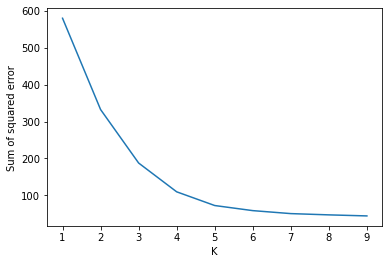

In [7]:
# Finding the k value.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Homicides']])
    sse.append(km.inertia_)
# Plot results.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
# Performing K-means Clustering.
kmeans1 = KMeans(n_clusters=4)
y_kmeans1 = kmeans1.fit_predict(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Homicides']])
# Print the centers.
kmeans1.cluster_centers_

array([[ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  1.29483283e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  1.16748768e-01],
       [ 5.93731460e-01,  9.48897059e-01,  3.52415966e-01,
        -8.32667268e-17,  1.69117647e-01,  8.30882353e-01,
         0.00000000e+00,  5.55111512e-17,  1.16911765e-01],
       [ 7.58550631e-01,  9.41451613e-01,  3.06451613e-01,
         1.00000000e+00, -1.38777878e-17,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  1.54838710e-01]])

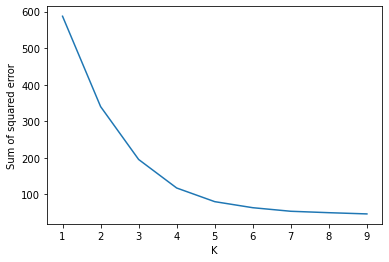

In [9]:
# Finding the k value.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Assaults']])
    sse.append(km.inertia_)
# Plot results.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [10]:
# Performing K-means Clustering.
kmeans2 = KMeans(n_clusters=4)
y_kmeans2 = kmeans2.fit_predict(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Assaults']])
# Print the centers.
kmeans2.cluster_centers_

array([[ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  3.95891690e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  4.25001206e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  4.07381343e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  4.49220396e-01]])

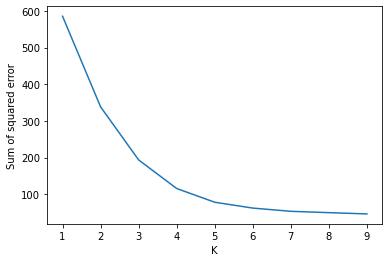

In [11]:
# Finding the k value.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Battery']])
    sse.append(km.inertia_)
# Plot results.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [12]:
# Performing K-means Clustering.
kmeans3 = KMeans(n_clusters=4)
y_kmeans3 = kmeans3.fit_predict(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Battery']])
# Print the centers.
kmeans3.cluster_centers_

array([[ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  3.82482655e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  4.07119782e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  4.01797711e-01],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  3.80782261e-01]])

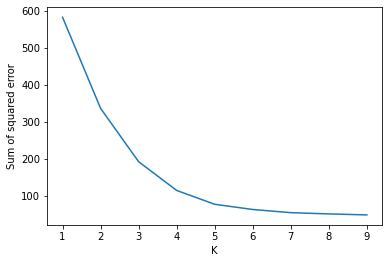

In [13]:
# Finding the k value.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Robbery']])
    sse.append(km.inertia_)
# Plot results.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
# Performing K-means Clustering.
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Robbery']])
# Print the centers.
kmeans4.cluster_centers_

array([[ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  3.95575221e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  3.88936170e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  3.93300493e-01],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  4.00705882e-01]])

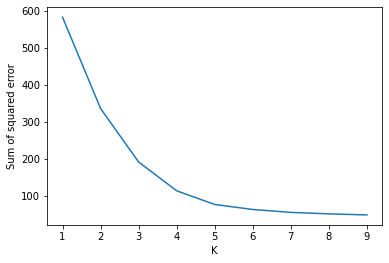

In [15]:
# Finding the k value.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Kidnapping']])
    sse.append(km.inertia_)
# Plot results.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [16]:
# Performing K-means Clustering.
kmeans5 = KMeans(n_clusters=4)
y_kmeans5 = kmeans5.fit_predict(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Kidnapping']])
# Print the centers.
kmeans5.cluster_centers_

array([[ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  1.38777878e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  1.23152709e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  1.12462006e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
         0.00000000e+00, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  9.20353982e-02],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  1.20000000e-01]])

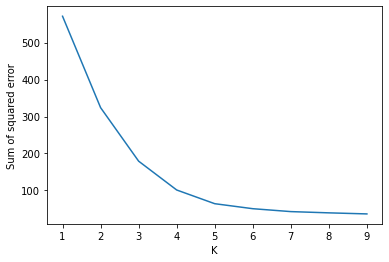

In [17]:
# Finding the k value.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Rapes']])
    sse.append(km.inertia_)
# Plot results.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [18]:
# Performing K-means Clustering.
kmeans6 = KMeans(n_clusters=4)
y_kmeans6 = kmeans6.fit_predict(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','Rapes']])
# Print the centers.
kmeans6.cluster_centers_

array([[ 7.58550631e-01,  9.41451613e-01,  3.06451613e-01,
         1.00000000e+00, -1.38777878e-17,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  9.53079179e-02],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  8.71787787e-02],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  1.38777878e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  7.51231527e-02],
       [ 5.93731460e-01,  9.48897059e-01,  3.52415966e-01,
        -8.32667268e-17,  1.69117647e-01,  8.30882353e-01,
         0.00000000e+00,  5.55111512e-17,  7.45320856e-02]])

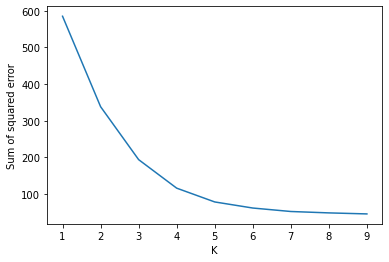

In [19]:
# Finding the k value.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','VCrimes']])
    sse.append(km.inertia_)
# Plot results.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [20]:
# Performing K-means Clustering.
kmeans7 = KMeans(n_clusters=4)
y_kmeans7 = kmeans7.fit_predict(df[['Temp','Humidity','Wind','Fog','Snow','Rain','Sunny','Cloudy','VCrimes']])
# Print the centers.
kmeans7.cluster_centers_

array([[ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  4.92728175e-01],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  4.68432154e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  4.68019547e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  4.93318760e-01]])

In [21]:
centers1 = [[ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  1.19469027e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  1.29483283e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  1.16748768e-01],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  1.41176471e-01]]

for i in range(len(centers1)):
    print("Cluster " + str(i+1) + ": ")
    print("----------")
    print("Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Homicides")
    for j in range(len(centers1[i])):
        print(str(round(centers1[i][j],5)), end=", ")
    print()

Cluster 1: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Homicides
0.65113, 0.93982, 0.34576, -0.0, -0.0, 1.0, 0.0, 0.0, 0.11947, 
Cluster 2: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Homicides
0.58725, 0.90289, 0.28463, -0.0, 0.0, 0.0, 1.0, -0.0, 0.12948, 
Cluster 3: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Homicides
0.6043, 0.88054, 0.33779, -0.0, 0.0, 0.0, 0.0, 1.0, 0.11675, 
Cluster 4: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Homicides
0.63765, 0.95553, 0.32773, 0.72941, 0.27059, 0.0, 0.0, 0.0, 0.14118, 


In [22]:
centers2 = [[ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  4.07381343e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  4.25001206e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  4.49220396e-01],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  3.95891690e-01]]

for i in range(len(centers2)):
    print("Cluster " + str(i+1) + ": ")
    print("----------")
    print("Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Assaults")
    for j in range(len(centers2[i])):
        print(str(round(centers2[i][j],5)), end=", ")
    print()

Cluster 1: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Assaults
0.6043, 0.88054, 0.33779, -0.0, 0.0, 0.0, 0.0, 1.0, 0.40738, 
Cluster 2: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Assaults
0.58725, 0.90289, 0.28463, -0.0, 0.0, 0.0, 1.0, -0.0, 0.425, 
Cluster 3: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Assaults
0.65113, 0.93982, 0.34576, -0.0, -0.0, 1.0, 0.0, 0.0, 0.44922, 
Cluster 4: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Assaults
0.63765, 0.95553, 0.32773, 0.72941, 0.27059, 0.0, 0.0, 0.0, 0.39589, 


In [23]:
centers3 = [[ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  3.80782261e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  4.07119782e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  4.01797711e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  3.82482655e-01]]

for i in range(len(centers3)):
    print("Cluster " + str(i+1) + ": ")
    print("----------")
    print("Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Battery")
    for j in range(len(centers3[i])):
        print(str(round(centers3[i][j],5)), end=", ")
    print()

Cluster 1: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Battery
0.63765, 0.95553, 0.32773, 0.72941, 0.27059, 0.0, 0.0, 0.0, 0.38078, 
Cluster 2: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Battery
0.58725, 0.90289, 0.28463, -0.0, 0.0, 0.0, 1.0, -0.0, 0.40712, 
Cluster 3: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Battery
0.65113, 0.93982, 0.34576, -0.0, -0.0, 1.0, 0.0, 0.0, 0.4018, 
Cluster 4: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Battery
0.6043, 0.88054, 0.33779, -0.0, 0.0, 0.0, 0.0, 1.0, 0.38248, 


In [24]:
centers4 = [[ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  4.00705882e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  3.88936170e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  3.93300493e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  3.95575221e-01]]

for i in range(len(centers4)):
    print("Cluster " + str(i+1) + ": ")
    print("----------")
    print("Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Robbery")
    for j in range(len(centers4[i])):
        print(str(round(centers4[i][j],5)), end=", ")
    print()

Cluster 1: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Robbery
0.63765, 0.95553, 0.32773, 0.72941, 0.27059, 0.0, 0.0, 0.0, 0.40071, 
Cluster 2: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Robbery
0.58725, 0.90289, 0.28463, -0.0, 0.0, 0.0, 1.0, -0.0, 0.38894, 
Cluster 3: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Robbery
0.6043, 0.88054, 0.33779, -0.0, 0.0, 0.0, 0.0, 1.0, 0.3933, 
Cluster 4: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Robbery
0.65113, 0.93982, 0.34576, -0.0, -0.0, 1.0, 0.0, 0.0, 0.39558, 


In [25]:
centers5 = [[ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  1.12462006e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  1.23152709e-01],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  9.20353982e-02],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  1.20000000e-01]]

for i in range(len(centers5)):
    print("Cluster " + str(i+1) + ": ")
    print("----------")
    print("Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Kidnapping")
    for j in range(len(centers5[i])):
        print(str(round(centers5[i][j],5)), end=", ")
    print()

Cluster 1: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Kidnapping
0.58725, 0.90289, 0.28463, -0.0, 0.0, 0.0, 1.0, -0.0, 0.11246, 
Cluster 2: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Kidnapping
0.6043, 0.88054, 0.33779, -0.0, 0.0, 0.0, 0.0, 1.0, 0.12315, 
Cluster 3: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Kidnapping
0.65113, 0.93982, 0.34576, -0.0, -0.0, 1.0, 0.0, 0.0, 0.09204, 
Cluster 4: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Kidnapping
0.63765, 0.95553, 0.32773, 0.72941, 0.27059, 0.0, 0.0, 0.0, 0.12, 


In [26]:
centers6 = [[ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  2.08166817e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  7.51231527e-02],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  8.71787787e-02],
       [ 6.51130065e-01,  9.39823009e-01,  3.45764855e-01,
        -1.38777878e-17, -1.38777878e-17,  1.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  7.60257442e-02],
       [ 6.37646122e-01,  9.55529412e-01,  3.27731092e-01,
         7.29411765e-01,  2.70588235e-01,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  8.77005348e-02]]

for i in range(len(centers6)):
    print("Cluster " + str(i+1) + ": ")
    print("----------")
    print("Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Rapes")
    for j in range(len(centers6[i])):
        print(str(round(centers6[i][j],5)), end=", ")
    print()

Cluster 1: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Rapes
0.6043, 0.88054, 0.33779, -0.0, 0.0, 0.0, 0.0, 1.0, 0.07512, 
Cluster 2: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Rapes
0.58725, 0.90289, 0.28463, -0.0, 0.0, 0.0, 1.0, -0.0, 0.08718, 
Cluster 3: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Rapes
0.65113, 0.93982, 0.34576, -0.0, -0.0, 1.0, 0.0, 0.0, 0.07603, 
Cluster 4: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, Rapes
0.63765, 0.95553, 0.32773, 0.72941, 0.27059, 0.0, 0.0, 0.0, 0.0877, 


In [27]:
centers7 = [[ 5.93731460e-01,  9.48897059e-01,  3.52415966e-01,
        -8.32667268e-17,  1.69117647e-01,  8.30882353e-01,
         0.00000000e+00,  5.55111512e-17,  4.65373799e-01],
       [ 5.87246777e-01,  9.02887538e-01,  2.84628745e-01,
        -2.35922393e-16,  6.93889390e-17,  1.11022302e-16,
         1.00000000e+00, -2.22044605e-16,  4.92728175e-01],
       [ 6.04301083e-01,  8.80541872e-01,  3.37790289e-01,
        -1.52655666e-16,  1.38777878e-17,  8.32667268e-17,
         5.55111512e-17,  1.00000000e+00,  4.68019547e-01],
       [ 7.58550631e-01,  9.41451613e-01,  3.06451613e-01,
         1.00000000e+00, -1.38777878e-17,  5.55111512e-17,
         0.00000000e+00,  5.55111512e-17,  5.20498651e-01]]

for i in range(len(centers7)):
    print("Cluster " + str(i+1) + ": ")
    print("----------")
    print("Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, VCrimes")
    for j in range(len(centers7[i])):
        print(str(round(centers7[i][j],5)), end=", ")
    print()

Cluster 1: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, VCrimes
0.59373, 0.9489, 0.35242, -0.0, 0.16912, 0.83088, 0.0, 0.0, 0.46537, 
Cluster 2: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, VCrimes
0.58725, 0.90289, 0.28463, -0.0, 0.0, 0.0, 1.0, -0.0, 0.49273, 
Cluster 3: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, VCrimes
0.6043, 0.88054, 0.33779, -0.0, 0.0, 0.0, 0.0, 1.0, 0.46802, 
Cluster 4: 
----------
Temp, Humidity, Wind, Fog, Snow, Rain, Sunny, Cloudy, VCrimes
0.75855, 0.94145, 0.30645, 1.0, -0.0, 0.0, 0.0, 0.0, 0.5205, 
